<a href="https://colab.research.google.com/github/Hasebul/Food_Image_Classification/blob/main/Project_tfl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_path ='/content/drive/MyDrive/Project_ML/10_food_classes_all_data'

In [ ]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk(base_path):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/content/drive/MyDrive/Project_ML/10_food_classes_all_data'.
There are 10 directories and 0 images in '/content/drive/MyDrive/Project_ML/10_food_classes_all_data/test'.
There are 0 directories and 250 images in '/content/drive/MyDrive/Project_ML/10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '/content/drive/MyDrive/Project_ML/10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '/content/drive/MyDrive/Project_ML/10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '/content/drive/MyDrive/Project_ML/10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '/content/drive/MyDrive/Project_ML/10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '/content/drive/MyDrive/Project_ML/10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '/content/drive/MyDrive/Project_M

In [ ]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
train_dir = base_path+'/train'
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
!pip install ktrain

     |████████████████████████████████| 25.3 MB 1.4 MB/s 
     |████████████████████████████████| 22.3 MB 1.7 MB/s 
     |████████████████████████████████| 981 kB 39.8 MB/s 
     |████████████████████████████████| 263 kB 51.4 MB/s 
     |████████████████████████████████| 2.8 MB 42.0 MB/s 
     |████████████████████████████████| 1.2 MB 43.6 MB/s 
     |████████████████████████████████| 468 kB 47.7 MB/s 
     |████████████████████████████████| 67 kB 4.3 MB/s 
     |████████████████████████████████| 895 kB 42.1 MB/s 
     |████████████████████████████████| 3.3 MB 37.4 MB/s 
     |████████████████████████████████| 596 kB 40.5 MB/s 
  Created wheel for ktrain: filename=ktrain-0.29.2-py3-none-any.whl size=25294171 sha256=20d3ee5a23d0bcfafbf27b68ae4d9db961bfa2fdcfe719a99a70f210b80addfa
  Stored in directory: /root/.cache/pip/wheels/db/b1/ad/94fe0ceeaa8ed0319e74773cba99b6aa6192998b1035adc295
  Created wheel for seqeval: filename=seqeval-0.0.19-py3-none-any.whl size=9931 sha256=457a33d5bc3d936e

In [ ]:
import ktrain
from ktrain import vision as vis

(train_data, val_data, preproc) = vis.images_from_folder(datadir=base_path,
                                              # use a default data augmentation with horizontal_flip=True
                                              data_aug=vis.get_data_aug(horizontal_flip=True), 
                                              train_test_names=['train', 'test'],
                                               target_size=(224,224), color_mode='rgb')

Found 7500 images belonging to 10 classes.
Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


#MODEL1 : ResNet50

In [ ]:
model_1 = vis.image_classifier('pretrained_resnet50', train_data, val_data)
learner_1 = ktrain.get_learner(model=model_1, train_data=train_data, val_data=val_data, 
                             workers=8, use_multiprocessing=False, batch_size=64)

The normalization scheme has been changed for use with a pretrained_resnet50 model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? False
94781440/94765736 [==============================] - 1s 0us/step
pretrained_resnet50 model created.


In [ ]:
model_1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
len(model_1.layers)

178

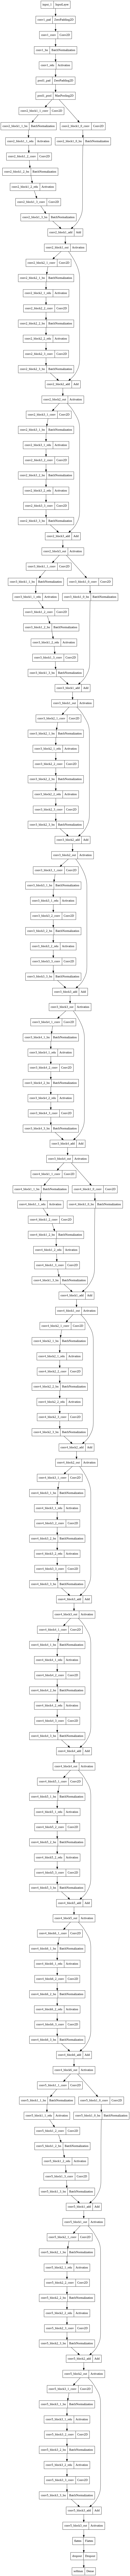

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_1)

In [ ]:
learner_1.freeze(freeze_range=15)
#learner.print_layers()

learner_1.lr_find()

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
117/117 [==============================] - 221s 2s/step - loss: 5.4458 - accuracy: 0.0866
Epoch 2/1024
117/117 [==============================] - 120s 962ms/step - loss: 5.1940 - accuracy: 0.0968
Epoch 3/1024
117/117 [==============================] - 120s 964ms/step - loss: 4.8747 - accuracy: 0.1153
Epoch 4/1024
117/117 [==============================] - 120s 964ms/step - loss: 4.1405 - accuracy: 0.1817
Epoch 5/1024
117/117 [==============================] - 121s 967ms/step - loss: 2.7960 - accuracy: 0.3897
Epoch 6/1024
117/117 [==============================] - 120s 968ms/step - loss: 1.6284 - accuracy: 0.6299
Epoch 7/1024
117/117 [==============================] - 121s 973ms/step - loss: 1.2081 - accuracy: 0.7316
Epoch 8/1024
117/117 [==============================] - 123s 988ms/step - loss: 1.9286 - accuracy: 0.6310
Epoch 9/1024
117/117 [==============================] - 65s 487ms/step -

In [ ]:
learner_1.lr_plot()

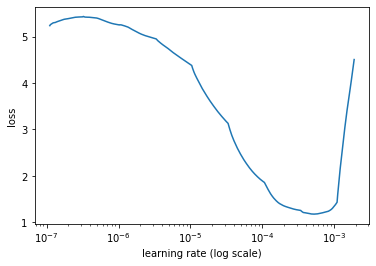

early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 0.0001...
Epoch 1/1024
118/118 [==============================] - 220s 2s/step - loss: 2.8029 - accuracy: 0.4288 - val_loss: 0.7704 - val_accuracy: 0.8088
Epoch 2/1024
118/118 [==============================] - 147s 1s/step - loss: 1.3137 - accuracy: 0.6952 - val_loss: 0.6648 - val_accuracy: 0.8560
Epoch 3/1024
118/118 [==============================] - 147s 1s/step - loss: 0.9915 - accuracy: 0.7672 - val_loss: 0.5511 - val_accuracy: 0.8792
Epoch 4/1024
118/118 [==============================] - 147s 1s/step - loss: 0.7984 - accuracy: 0.8029 - val_loss: 0.5299 - val_accuracy: 0.8812
Epoch 5/1024
118/118 [==============================] - 147s 1s/step - loss: 0.6893 - accuracy: 0.8268 - val_loss: 0.5135 - val_accuracy: 0.8844
Epoch 6/1024
118/118 [==============================] - 146s 1s/step - loss: 0.5836 - accu

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  after removing the cwd from sys.path.


final loss:0.3683817982673645, final accuracy:0.9100000262260437


In [ ]:

learner_1.autofit(1e-4)
loss, acc = learner_1.model.evaluate_generator(learner_1.val_data, 
                                             steps=len(learner_1.val_data))
print('final loss:%s, final accuracy:%s' % (loss, acc))


#MODEL2: Inception V3

In [ ]:
model_2 = vis.image_classifier('pretrained_inception', train_data, val_data)
learner_2 = ktrain.get_learner(model=model_2, train_data=train_data, val_data=val_data, 
                             workers=8, use_multiprocessing=False, batch_size=64)

The normalization scheme has been changed for use with a pretrained_inception model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? False
87924736/87910968 [==============================] - 1s 0us/step
pretrained_inception model created.


In [ ]:
model_2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [ ]:
print('Number of layers:', len(model_2.layers))

Number of layers: 314


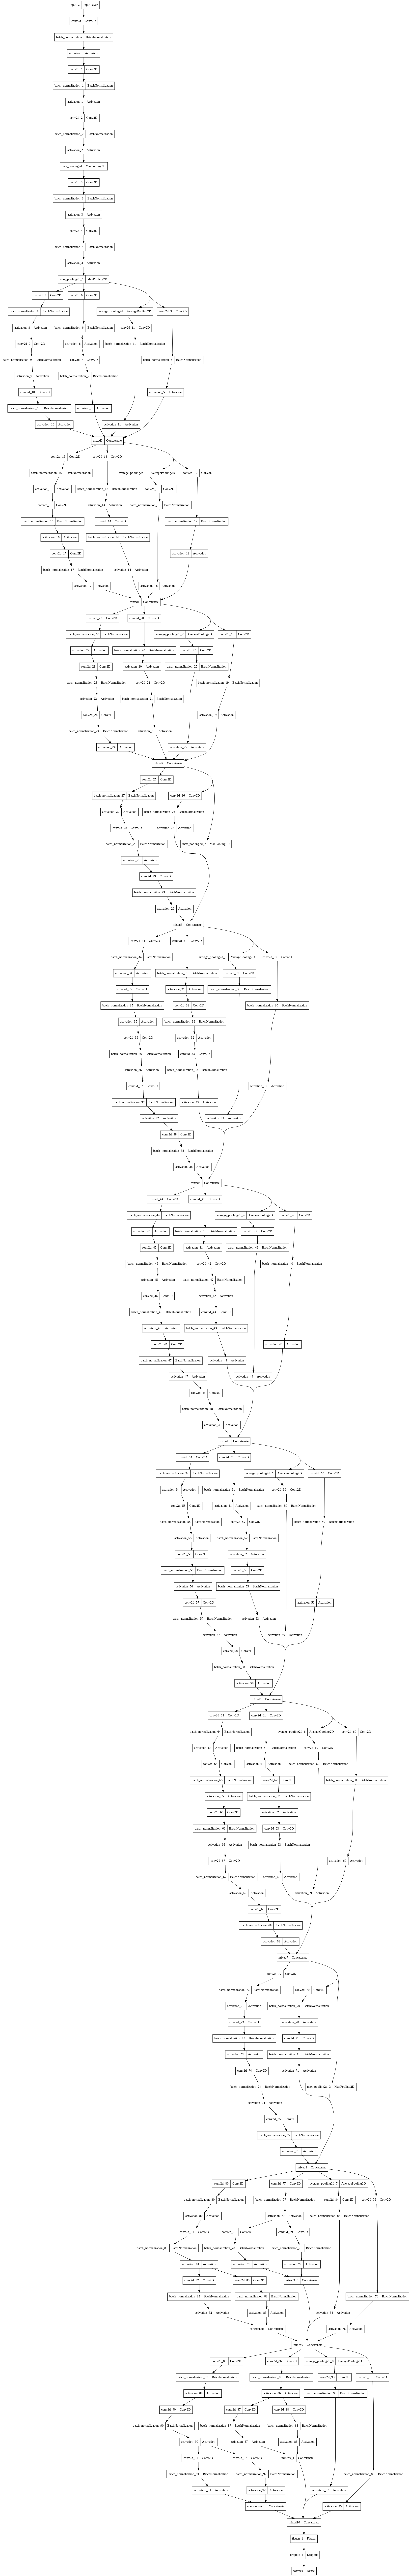

In [ ]:

from tensorflow.keras.utils import plot_model
plot_model(model_2)

In [ ]:
learner_2.freeze(freeze_range=15)
#learner.print_layers()

learner_2.lr_find()

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
117/117 [==============================] - 409s 3s/step - loss: 2.9544 - accuracy: 0.1058
Epoch 2/1024
117/117 [==============================] - 139s 1s/step - loss: 2.8841 - accuracy: 0.1134
Epoch 3/1024
117/117 [==============================] - 136s 1s/step - loss: 2.7914 - accuracy: 0.1261
Epoch 4/1024
117/117 [==============================] - 137s 1s/step - loss: 2.4906 - accuracy: 0.1852
Epoch 5/1024
117/117 [==============================] - 135s 1s/step - loss: 1.8722 - accuracy: 0.3700
Epoch 6/1024
117/117 [==============================] - 136s 1s/step - loss: 1.1400 - accuracy: 0.6244
Epoch 7/1024
117/117 [==============================] - 136s 1s/step - loss: 0.7958 - accuracy: 0.7421
Epoch 8/1024
117/117 [==============================] - 136s 1s/step - loss: 0.7195 - accuracy: 0.7790
Epoch 9/1024
117/117 [==============================] - 136s 1s/step - loss: 2.1905 - accurac

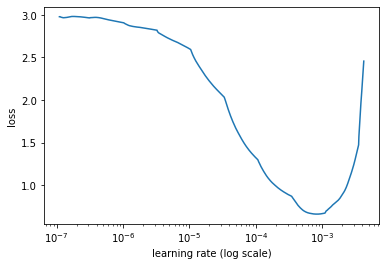

In [ ]:
learner_2.lr_plot()

In [ ]:

learner_2.autofit(1e-4)
loss, acc = learner_2.model.evaluate_generator(learner_2.val_data, 
                                             steps=len(learner_2.val_data))
print('final loss:%s, final accuracy:%s' % (loss, acc))


early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 0.0001...
Epoch 1/1024
118/118 [==============================] - 364s 3s/step - loss: 1.7894 - accuracy: 0.4192 - val_loss: 0.6882 - val_accuracy: 0.7760
Epoch 2/1024
118/118 [==============================] - 171s 1s/step - loss: 0.9213 - accuracy: 0.7019 - val_loss: 0.4860 - val_accuracy: 0.8428
Epoch 3/1024
118/118 [==============================] - 170s 1s/step - loss: 0.7382 - accuracy: 0.7607 - val_loss: 0.4198 - val_accuracy: 0.8700
Epoch 4/1024
118/118 [==============================] - 169s 1s/step - loss: 0.5950 - accuracy: 0.8107 - val_loss: 0.3896 - val_accuracy: 0.8724
Epoch 5/1024
118/118 [==============================] - 169s 1s/step - loss: 0.5236 - accuracy: 0.8320 - val_loss: 0.3766 - val_accuracy: 0.8832
Epoch 6/1024
118/118 [==============================] - 180s 1s/step - loss: 0.4359 - accu

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  after removing the cwd from sys.path.


final loss:0.31415247917175293, final accuracy:0.8992000222206116


#MODEL3: EfficientNetB7

In [ ]:
model_3 = vis.image_classifier('pretrained_efficientnetb7', train_data, val_data)
learner_3 = ktrain.get_learner(model=model_3, train_data=train_data, val_data=val_data, 
                             workers=8, use_multiprocessing=False, batch_size=64)

The normalization scheme has been changed for use with a pretrained_efficientnetb7 model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? False
258088960/258076736 [==============================] - 6s 0us/step
pretrained_efficientnetb7 model created.


In [ ]:
model_3.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_3[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0]']    

In [ ]:
print('Number of layers:', len(model_3.layers))

Number of layers: 816


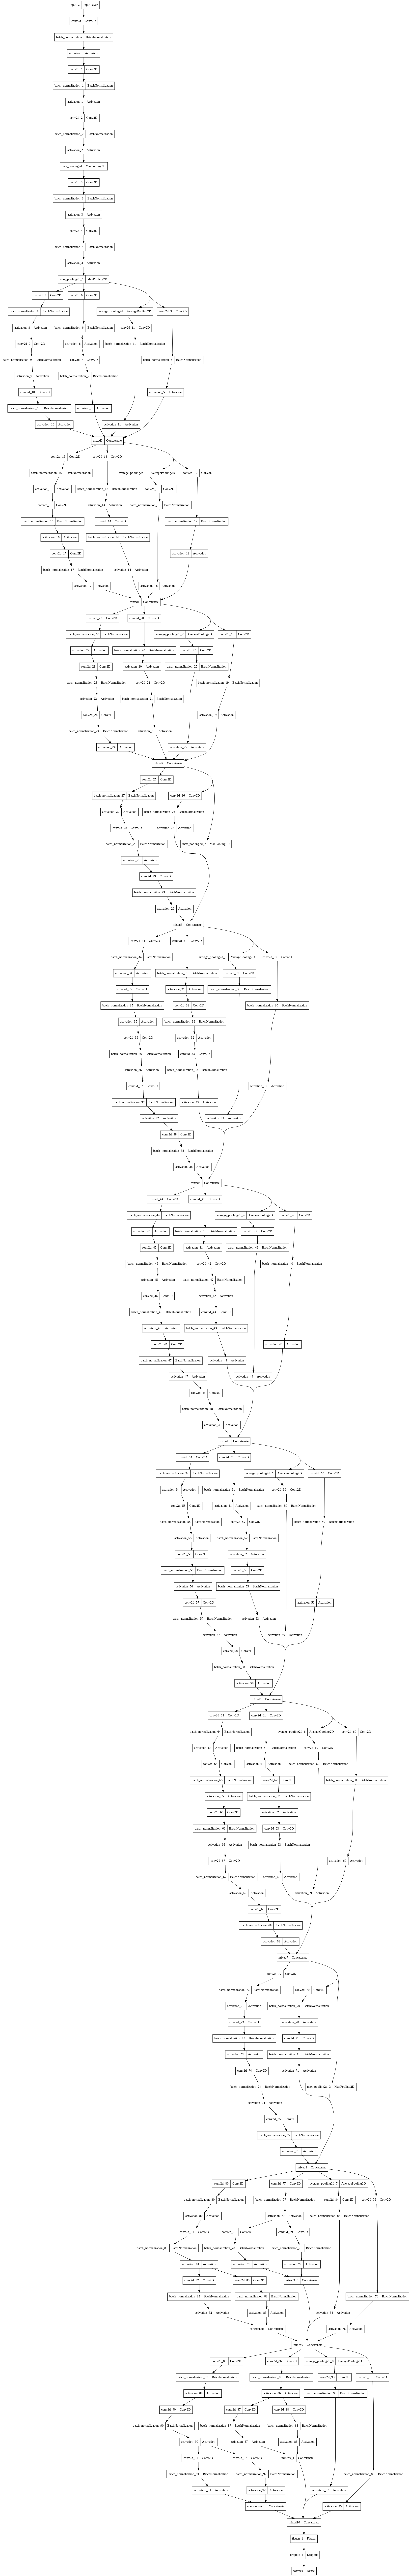

In [ ]:

from tensorflow.keras.utils import plot_model
plot_model(model_3)

#ResourceExhaustedError: Graph execution error

In [ ]:
learner_3.freeze(freeze_range=15)
#learner.print_layers()

learner_3.lr_find()

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024


ResourceExhaustedError: ignored

In [ ]:
learner_3.lr_plot()

In [ ]:

learner_3.freeze(freeze_range=15)
learner_3.autofit(1e-4)
loss, acc = learner_3.model.evaluate_generator(learner_3.val_data, 
                                             steps=len(learner_3.val_data))
print('final loss:%s, final accuracy:%s' % (loss, acc))


early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 0.0001...
Epoch 1/1024


ResourceExhaustedError: ignored